<a href="https://colab.research.google.com/github/tashfeen786/python-Projects/blob/main/Module4_DIY_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Background: The Great Migration

**Year: 3050**

The world as we knew it has changed drastically. After decades of conflict, disease, and a relentless zombie apocalypse, the human race faces extinction. The relentless hordes of the undead have ravaged cities, reduced populations, and devastated the planet's ecosystems.

In a desperate bid for survival, the remaining factions of humanity have united to embark on a monumental journey to a new home: **Earth Junior**, a distant planet believed to be free from the scourge of the undead.

As they prepare for this monumental journey, the survival of the human race hinges on their ability to screen potential passengers at the spaceship station. It is crucial that no zombies are allowed to enter the spacecraft, as even a single infected individual could jeopardize the entire mission and the future of humanity.

In this dire situation, you find yourself as the last surviving machine learning engineer, tasked with developing a screening model to predict the zombie-ness of a person. A high human-zombie score would mean the person is likely to be a zombie. The fate of the human race depends on your expertise in machine learning, and you must create a reliable system to ensure the success of this migration to 'Earth Junior'.


# Task 1 -- Linear Regression  

### Introduction

In this assignment, you will be implementing Linear Regression and Logistic Regression models for the provided dataset from scratch, and will be familiarizing yourself with the corresponding scikit-learn APIs. A description of the problem statement is given at the start of each part.

After this notebook you should be able to:

- Set up simple regression tasks.

- Understand the working of Linear Regression models and simple data preprocessing.

- Implement Linear Regression models using simple `numpy`.

Have fun!



# Human-Zombie Dataset

This dataset simulates human and zombie characteristics based on various lifestyle and physical traits. The dataset contains 1,000 entries, each with features that correlate with a continuous "Human-Zombie Score" ranging from 0 (complete human) to 100 (complete zombie).

This generation of human race has smart-chips embedded in their bloodstream that can keep track of and record all these features.

## Features

- **Height (cm):** The height of the individual measured in centimeters, it decreases with zombie score because zombies are known to shrink in height.

- **Weight (kg):** The weight of the individual measured in kilograms. Zombies tend to have a lower weight because of loss of muscle mass, tissue, organs (and soul??).

- **Screen Time (hrs):** The average number of hours spent in front of screens daily. This feature increases with the human-zombie score, reflecting a more sedentary lifestyle.

- **Junk Food (days/week):** The average number of days per week the individual consumes junk food. This feature also increases with the human-zombie score, indicating poorer dietary habits.

- **Physical Activity (hrs/week):** The total hours spent on physical activities per week. This feature decreases as the human-zombie score increases, suggesting a decline in physical activity.

- **Task Completion (scale):** Scale from 0 to 10 representing how often tasks are completed on time (0 = always on time, 10 = never on time). This score decreases with a higher human-zombie score, indicating declining productivity.

- **Human-Zombie Score:** A continuous score from 0 to 100 representing the degree of "zombie-ness" of the individual, where 0 is fully human and 100 is completely zombie-like.

## Usage

This dataset can be used for various analyses, including regression modeling to predict the human-zombie score based on lifestyle and physical traits.


## Multivariate Linear Regression

In this part, you will implement multivariate linear regression (from scratch) to predict the the human-zombie score during screening before the person can be allowed to enter the spaceship.

To do this, you have the human-zombie-datset.csv containing 1000 examples of the features described above and their scores.

Each one of these input features is stored using a different scale. The features include ranges 0-10, 17-100 and some between 130-200.  This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.

- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set.








### What is Linear Regression?

Linear regression is a fundamental machine learning algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation.

**The Linear Regression Equation:**

For multivariate linear regression (multiple features), the hypothesis function is:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

Or in matrix form:
$$h_\theta(x) = \theta^T x$$

Where:
- $h_\theta(x)$ = predicted value (Human-Zombie Score in our case)
- $\theta_0$ = bias term (intercept)
- $\theta_1, \theta_2, ..., \theta_n$ = weights/parameters for each feature
- $x_1, x_2, ..., x_n$ = input features (Height, Weight, Screen Time, etc.)

### What Do We Actually Find in Linear Regression?

Linear regression aims to find the **optimal parameters** $\theta$ that best fit our data. These parameters represent:

1. **$\theta_0$ (Bias)**: The baseline Human-Zombie Score when all features are zero
2. **$\theta_1$ (Height coefficient)**: How much the score changes per cm of height
3. **$\theta_2$ (Weight coefficient)**: How much the score changes per kg of weight
4. **And so on for each feature...**

The goal is to find the $\theta$ values that minimize the difference between our predictions and actual Human-Zombie Scores!

---

## Cost Functions: Measuring Our Mistakes

A cost function measures how wrong our predictions are. Different cost functions have different properties and use cases.

### 1. Mean Squared Error (MSE) - Most Common
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

**Properties:**
- Penalizes large errors heavily (squared term)
- Differentiable everywhere (good for gradient descent)
- Sensitive to outliers

### 2. Mean Absolute Error (MAE) - Robust to Outliers
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} |h_\theta(x^{(i)}) - y^{(i)}|$$

**Properties:**
- Linear penalty for errors
- More robust to outliers than MSE
- Not differentiable at zero (can cause issues in optimization)

### 3. Root Mean Squared Error (RMSE) - Interpretable Scale
$$J(\theta) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2}$$

**Properties:**
- Same scale as the target variable
- Easy to interpret (error in same units as Human-Zombie Score)
- Still sensitive to outliers like MSE

### When to Use Which Cost Function?

- **MSE**: Default choice, works well when you want to penalize large errors
- **MAE**: When your data has outliers or you want equal penalty for all errors
- **RMSE**: When you want interpretable error metrics in the same scale as your target

---

### Part A: Implementation from Scratch

#### Imports

Start off with importing in the required libraries. Note that you are **only** allowed to use `sklearn`'s train_test_split in this part and no other function from `sklearn`.

In [1]:
import numpy as np
import pandas as pd

#### Preparing Data

Load in your dataset and perform train-test split. Apply preprocessing steps to cater to missing values, categorical variables etc. if necessary.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load dataset and print first few rows
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of human_zombie_dataset_v5.csv')
df.head()

,Height (cm),Weight (kg),Screen Time (hrs),Junk Food (days/week),Physical Activity (hrs/week),Task Completion (scale),Human-Zombie Score
0,157,41,8.455099,5.622736,4.474819,6.166119,54.881350
1,151,40,8.581430,5.922744,3.749707,1.084877,71.518937
2,166,45,5.018847,5.746557,4.596662,2.030814,60.276338
3,160,75,6.417010,4.634547,4.546153,3.360430,54.488318
4,153,74,4.417465,4.740153,6.601801,5.758603,42.365480


In [6]:

# View data types and non-null counts
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Height (cm)                   1000 non-null   int64  
 1   Weight (kg)                   1000 non-null   int64  
 2   Screen Time (hrs)             1000 non-null   float64
 3   Junk Food (days/week)         1000 non-null   float64
 4   Physical Activity (hrs/week)  1000 non-null   float64
 5   Task Completion (scale)       1000 non-null   float64
 6   Human-Zombie Score            1000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 54.8 KB
None
       Height (cm)  Weight (kg)  Screen Time (hrs)  Junk Food (days/week)  \
count  1000.000000  1000.000000        1000.000000            1000.000000   
mean    155.694000    58.257000           6.489160               4.463424   
std      12.497942    15.200263           2.510424               1.507319   


In [7]:
print(df.isnull().sum())


Height (cm)                     0
Weight (kg)                     0
Screen Time (hrs)               0
Junk Food (days/week)           0
Physical Activity (hrs/week)    0
Task Completion (scale)         0
Human-Zombie Score              0
dtype: int64


In [9]:
print(f"Duplicate rows: {df.duplicated().sum()}")



Duplicate rows: 0


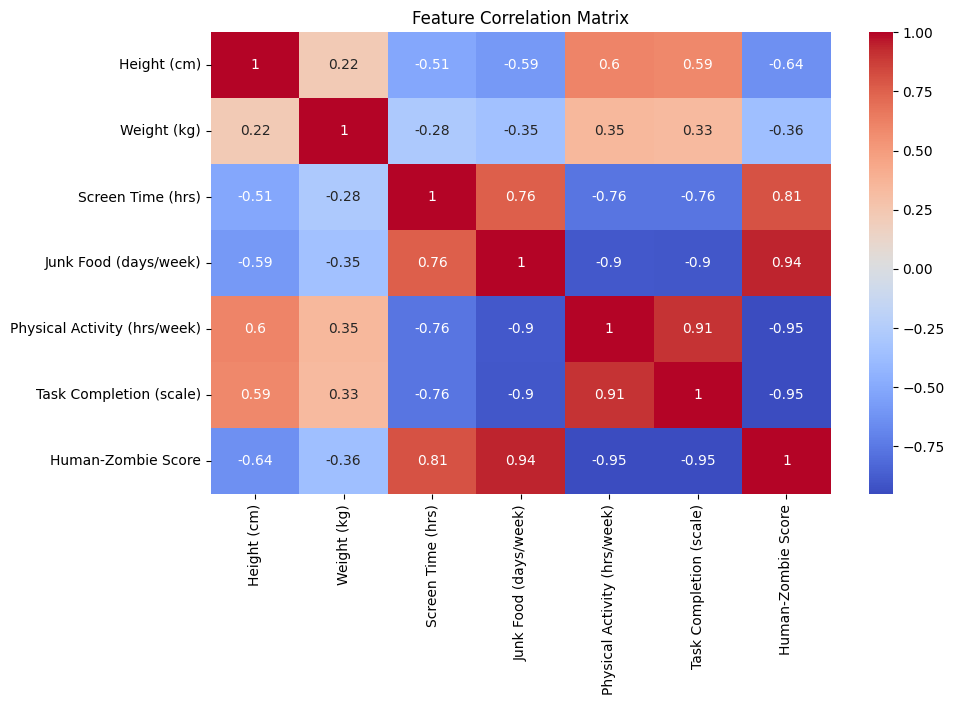

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


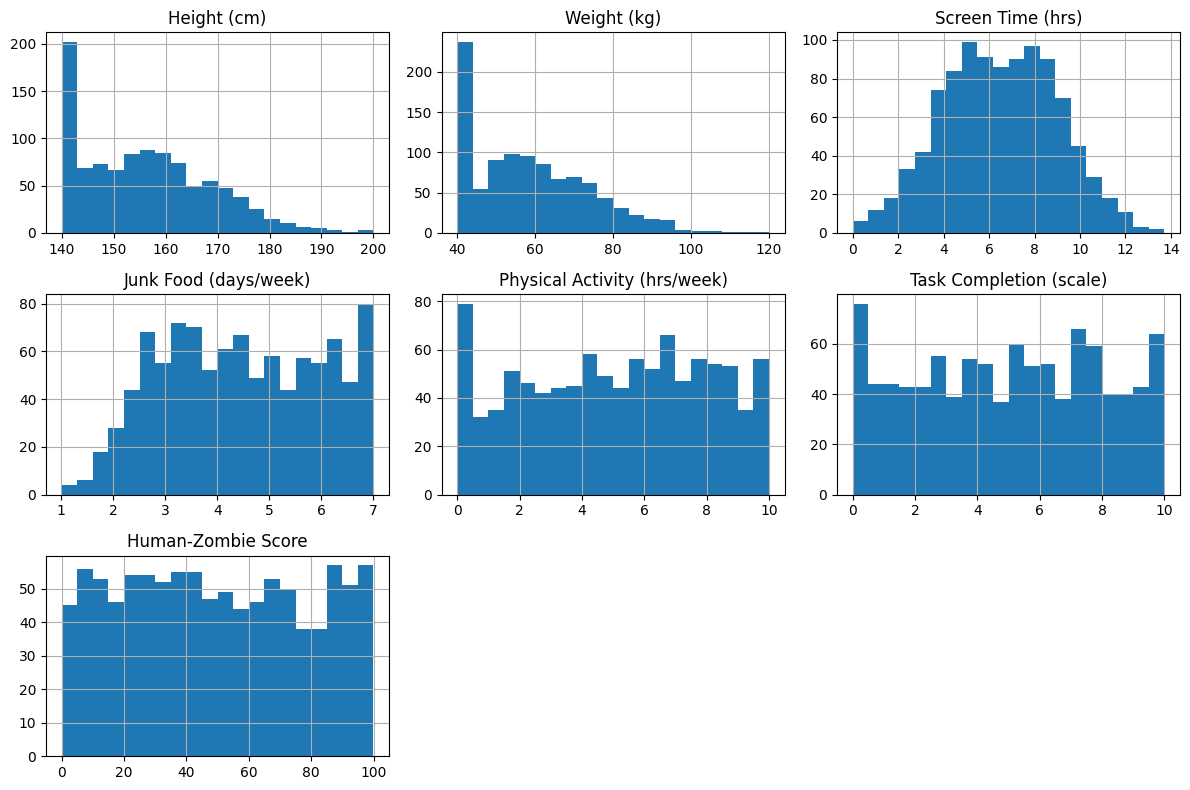

In [11]:
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('Human-Zombie Score', axis=1).values
y = df['Human-Zombie Score'].values.reshape(-1, 1)

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("🔹 X_train shape:", X_train.shape)
print("🔹 X_test shape :", X_test.shape)
print("🔹 y_train shape:", y_train.shape)
print("🔹 y_test shape :", y_test.shape)


🔹 X_train shape: (800, 6)
🔹 X_test shape : (200, 6)
🔹 y_train shape: (800, 1)
🔹 y_test shape : (200, 1)


#### Normalizing Data  

For models like Linear/Logistic Regression, and even for Neural Networks, Standardization/Normalization is a non-negotiable step in the preprocessing stage. You would find your model **broken** if you do not normalize your data.

One nice way to implement this is to create a class, `StandardScaler` that can be used to store the mean and standard deviation of each feature of the training set. The `StandardScaler` class also has two functions, `fit` and `transform`.

- The `fit` function is used to calculate the mean and standard deviation of each feature of the training set.

- The `transform` function is used to transform all the features using the corresponding mean and standard deviation, i.e. subtracting the mean and dividing by the standard deviation.

A very subtle and important point to note here is that the mean and standard deviation should be calculated only on the training set, and then applied to the test set. This is because in real-world scenarios, we do not have access to the test set, and hence we cannot calculate the mean and standard deviation of the test set.

In [18]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        """
        Compute mean and standard deviation for each feature (on training data).
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1  # prevent division by zero

    def transform(self, X):
        """
        Standardize the dataset using the stored mean and std.
        """
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        """
        Fit to the data and then transform it.
        """
        self.fit(X)
        return self.transform(X)


In [20]:
from sklearn.preprocessing import StandardScaler


# Example data
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# To see the learned parameters
print("Mean:", scaler.mean_)        # Mean of each feature
print("Scale:", scaler.scale_)      # Standard deviation of each feature

# If you need to convert back to DataFrame (if input was DataFrame)
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# To inverse the transformation (get back original data)
# X_original = scaler.inverse_transform(X_scaled)

Mean: [155.6575      58.10875      6.49052518   4.44925149   5.05423437
   4.99272468]
Scale: [12.58452199 15.04275319  2.49661353  1.52081147  2.96409383  2.9776557 ]


## Gradient Descent: The Mathematical Journey to Minimum

### What is Gradient Descent?

Imagine you're a zombie trying to find the lowest point in a valley (minimum cost) while blindfolded. Gradient descent is like feeling the slope of the ground and taking steps in the steepest downhill direction!

### The Mathematics Behind Gradient Descent

**The Gradient**: The gradient $\nabla J(\theta)$ tells us the direction of steepest increase in our cost function.

For MSE cost function, the gradient with respect to each parameter is:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

**The Update Rule**: We move in the opposite direction of the gradient:

$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

Where:
- $\alpha$ = learning rate (how big steps we take)
- $\frac{\partial J(\theta)}{\partial \theta_j}$ = partial derivative (slope) of cost function

### How We Calculate Gradients Step by Step:

1. **Forward Pass**: Calculate predictions using current $\theta$
2. **Calculate Error**: Find difference between predictions and actual values
3. **Calculate Gradients**: Use the error to compute how much to change each $\theta$
4. **Update Parameters**: Move $\theta$ in the direction that reduces cost
5. **Repeat**: Until convergence or maximum iterations


#### Gradient Descent Implementation




Now that your data is ready, you can start implementing the gradient descent algorithm.

You should be creating a class `LinearRegression`. This means implementing the following methods:

- `__init__`: The constructor of the class. You can initialize any variables, like the learning rate and the number of iterations, here.

- `fit`: This method will be used to train your model. It should take in the training data and labels as parameters, and learn the parameters using gradient descent. Save the loss values after every iteration in a list, and return it (for plotting later).

- `predict`: This method will be used to predict the labels for a given set of test data. It should take in the test data as a parameter, and return the predicted labels.

- `score`: This method will be used to calculate the mean square error for the test data. It should take in the test data and labels as parameters, and return the mean square error. Note that this is a unique case where the loss function and the final reported metric are the same.




1. Implement the `LinearRegression` class with support for different cost functions
2. Add methods for MSE, MAE, and RMSE
3. Compare how different cost functions affect the learning process
4. Visualize the gradient descent path

In [24]:
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, cost_function='mse'):
        """
        Initialize Linear Regression with different cost function options

        Parameters:
        - learning_rate: Step size for gradient descent (float)
        - num_iterations: Maximum number of iterations (int)
        - cost_function: Type of cost function ('mse', 'mae', or 'rmse')
        """
        self.theta_history = []  # Store theta at each iteration for plotting
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.cost_function = cost_function
        self.cost_history = []
        self.theta = None
        self.X_mean = None
        self.X_std = None

    def _add_bias(self, X):
        """Add bias term (column of ones) to feature matrix X"""
        return np.hstack([np.ones((X.shape[0], 1)), X])


    def _normalize_features(self, X, is_training=False):
        """Normalize features to have zero mean and unit variance"""
        if is_training:
          self.X_mean = np.mean(X, axis=0)
          self.X_std = np.std(X, axis=0)
          self.X_std[self.X_std == 0] = 1  # Prevent division by zero
        return (X - self.X_mean) / self.X_std

    def _compute_cost(self, predictions, y):
        """
        Compute cost based on selected cost function

        Parameters:
        - predictions: Model predictions (numpy array)
        - y: Actual target values (numpy array)

        Returns:
        - cost: Computed cost (float)
        """
        m = y.shape[0]
        errors = predictions - y

        if self.cost_function == 'mse':
          return (1 / (2 * m)) * np.sum(errors ** 2)
        elif self.cost_function == 'mae':
          return (1 / m) * np.sum(np.abs(errors))
        elif self.cost_function == 'rmse':
          return np.sqrt((1 / m) * np.sum(errors ** 2))
        else:
          raise ValueError("Unsupported cost function: choose 'mse', 'mae', or 'rmse'")

    def _compute_gradients(self, X, predictions, y):
        """
        Compute gradients based on selected cost function

        Parameters:
        - X: Feature matrix with bias (numpy array)
        - predictions: Model predictions (numpy array)
        - y: Actual target values (numpy array)

        Returns:
        - gradients: Computed gradients (numpy array)
        """
        m = y.shape[0]
        error = predictions - y

        if self.cost_function == 'mse' or self.cost_function == 'rmse':
          gradients = (1 / m) * X.T @ error
        elif self.cost_function == 'mae':
          gradients = (1 / m) * X.T @ np.sign(error)
        else:
          raise ValueError("Unsupported cost function: choose 'mse', 'mae', or 'rmse'")

        return gradients

    def fit(self, X, y, verbose=True):
        """
        Train the model using gradient descent with selected cost function

        Parameters:
        - X: Training features (numpy array or pandas DataFrame)
        - y: Training targets (numpy array or pandas Series)
        - verbose: Whether to print training progress (bool)

        Returns:
        - cost_history: List of cost values during training
        """
        X = self._normalize_features(X, is_training=True)
        X = self._add_bias(X)

        m, n = X.shape
        self.theta = np.zeros((n, 1))  # Initialize theta

        for i in range(self.num_iterations):
          predictions = X @ self.theta
          cost = self._compute_cost(predictions, y)
          gradients = self._compute_gradients(X, predictions, y)

          self.theta -= self.learning_rate * gradients
          self.cost_history.append(cost)
          self.theta_history.append(self.theta.copy().flatten())  # Flatten for easier plotting

          if verbose and i % 100 == 0:
             print(f"Iteration {i}: Cost = {cost:.4f}")

        return self.cost_history

    def predict(self, X):
        """
        Make predictions on new data

        Parameters:
        - X: Input features (numpy array or pandas DataFrame)

        Returns:
        - predictions: Predicted values (numpy array)
        """
        X = self._normalize_features(X, is_training=False)
        X = self._add_bias(X)
        return X @ self.theta

    def score(self, X, y):
        """
        Calculate mean squared error on test data

        Parameters:
        - X: Test features (numpy array or pandas DataFrame)
        - y: True target values (numpy array or pandas Series)

        Returns:
        - mse: Mean squared error (float)
        """
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        return mse

    def plot_cost_history(self):
        """Plot the cost history during training"""
        plt.plot(self.cost_history)
        plt.title("Cost vs Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.grid(True)
        plt.show()



    def plot_gradient_descent_path(self, X, y, theta0_range=(-10, 10), theta1_range=(-10, 10), resolution=50):
        """
        Plot the path taken by gradient descent on the cost function contours

        Parameters:
        - X: Input features (numpy array)
        - y: Target values (numpy array)
        - theta0_range: Range for first parameter (tuple)
        - theta1_range: Range for second parameter (tuple)
        - resolution: Number of points in each dimension (int)
        """
        # Check for 1D feature
        if X.shape[1] != 1:
          raise ValueError("Gradient descent path can only be plotted for 1 feature (plus bias).")

    # Normalize and add bias
        X_norm = self._normalize_features(X, is_training=False)
        X_bias = self._add_bias(X_norm)
        m = y.shape[0]

    # Generate grid of theta0 and theta1
        theta0_vals = np.linspace(theta0_range[0], theta0_range[1], resolution)
        theta1_vals = np.linspace(theta1_range[0], theta1_range[1], resolution)
        T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
        J_vals = np.zeros_like(T0)

    # Compute cost over the grid
        for i in range(resolution):
          for j in range(resolution):
            theta = np.array([[T0[i, j]], [T1[i, j]]])
            predictions = X_bias @ theta
            errors = predictions - y
            J_vals[i, j] = (1 / (2 * m)) * np.sum(errors ** 2)

    # Plot contour
        plt.figure(figsize=(10, 6))
        plt.contour(T0, T1, J_vals, levels=np.logspace(-2, 3, 30), cmap='viridis')
        plt.xlabel('Theta 0 (Bias)')
        plt.ylabel('Theta 1 (Weight)')
        plt.title('Gradient Descent Path')
        plt.grid(True)

    # Plot theta path
        theta_history = np.array(self.theta_history)
        plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro--', label='Gradient Path')
        plt.legend()
        plt.show()


# model = LinearRegression(learning_rate=0.01, num_iterations=1000, cost_function='mse')
# cost_history = model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# model.plot_cost_history()
# model.plot_gradient_descent_path(X_train, y_train)

/tmp/ipython-input-2692976388.py:17: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((X_b.dot(self.theta) - y) ** 2)


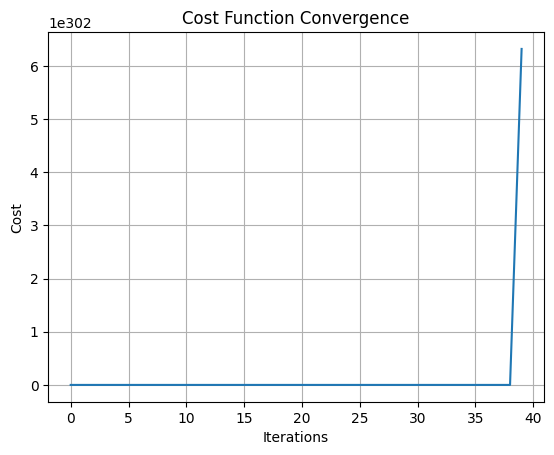

Cannot plot gradient descent path for multi-dimensional data (only works for 1 feature).


In [27]:
# Custom Linear Regression class
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
        self.theta = np.zeros((n + 1, 1))

        for _ in range(self.iterations):
            gradients = (2 / m) * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients
            cost = (1 / (2 * m)) * np.sum((X_b.dot(self.theta) - y) ** 2)
            self.cost_history.append(cost)
        return self.cost_history

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def plot_cost_history(self):
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence')
        plt.grid(True)
        plt.show()

    def plot_gradient_descent_path(self, X, y, theta0_range=(-1, 2), theta1_range=(-1, 2), resolution=100):
        if X.shape[1] != 1:
            print("Cannot plot gradient descent path for multi-dimensional data (only works for 1 feature).")
            return

        # Only works for 1 feature + bias
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        t0_vals = np.linspace(theta0_range[0], theta0_range[1], resolution)
        t1_vals = np.linspace(theta1_range[0], theta1_range[1], resolution)
        J_vals = np.zeros((resolution, resolution))

        for i in range(len(t0_vals)):
            for j in range(len(t1_vals)):
                t = np.array([[t0_vals[i]], [t1_vals[j]]])
                J_vals[i, j] = (1 / (2 * len(y))) * np.sum((X_b.dot(t) - y) ** 2)

        t0_vals, t1_vals = np.meshgrid(t0_vals, t1_vals)

        plt.contourf(t0_vals, t1_vals, J_vals.T, cmap='viridis')
        plt.xlabel('Theta 0')
        plt.ylabel('Theta 1')
        plt.title('Gradient Descent Path')
        plt.colorbar(label='Cost')
        plt.show()

# Train the model
model = LinearRegressionGD(learning_rate=0.1, iterations=100)
cost_history = model.fit(X_train, y_train)

# Plot cost history
model.plot_cost_history()

# Plot gradient descent path — only works if 1 feature
model.plot_gradient_descent_path(X_train, y_train)

### Part B: Regularized Linear Regression Using Scikit-learn

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to the human-zombie dataset.

Try out different values of regularization coefficient (known as `alpha` in `sklearn`) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression.

Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.


#### Importing Libraries

You have to use scikit-learn for this task

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature scaling (important for regularized regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression (using `sklearn`)

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it.

In [30]:

def train_and_evaluate(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse:.4f}")
    return model.coef_


In [31]:
print("Model Performance:\n")

# Linear Regression (no regularization)
lin_reg = LinearRegression()
theta_lin = train_and_evaluate(lin_reg, "Linear Regression")

# Ridge Regression
ridge = Ridge(alpha=1.0)
theta_ridge = train_and_evaluate(ridge, "Ridge Regression (alpha=1.0)")

# Lasso Regression
lasso = Lasso(alpha=0.1)
theta_lasso = train_and_evaluate(lasso, "Lasso Regression (alpha=0.1)")

# Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
theta_elastic = train_and_evaluate(elastic, "Elastic Net (alpha=0.1, l1_ratio=0.5)")


Model Performance:

Linear Regression MSE: 24.1441
Ridge Regression (alpha=1.0) MSE: 24.1374
Lasso Regression (alpha=0.1) MSE: 24.1950
Elastic Net (alpha=0.1, l1_ratio=0.5) MSE: 24.3576


#### Ridge

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it. Also plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Ridge.

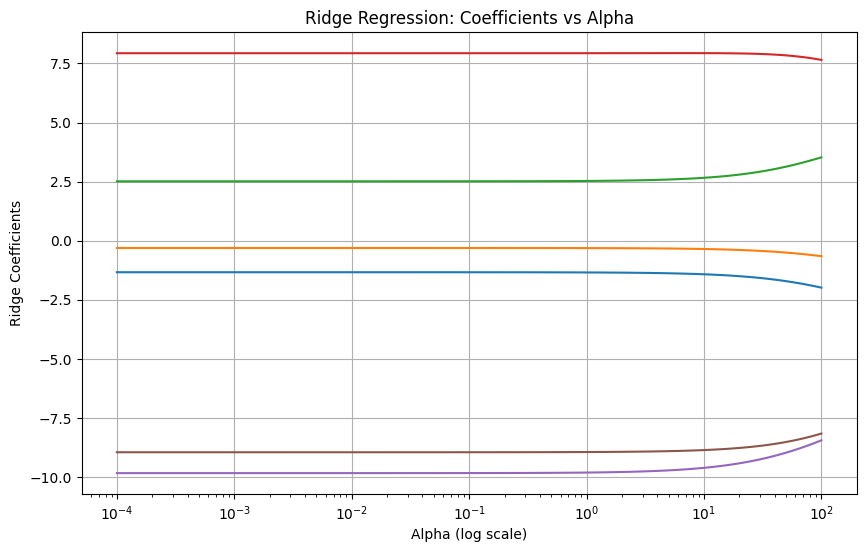

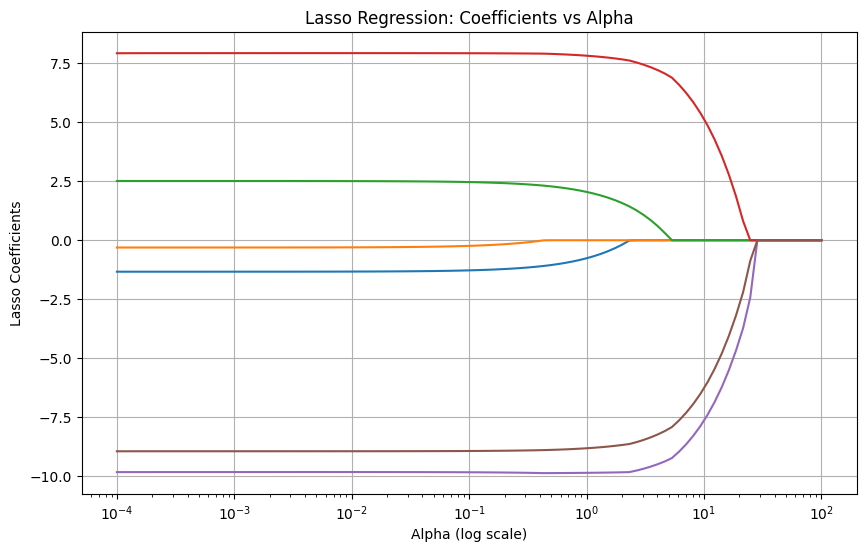

In [32]:
alphas = np.logspace(-4, 2, 100)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Plotting Ridge
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Ridge Coefficients')
plt.title('Ridge Regression: Coefficients vs Alpha')
plt.grid(True)
plt.show()

# Plotting Lasso
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Lasso Coefficients')
plt.title('Lasso Regression: Coefficients vs Alpha')
plt.grid(True)
plt.show()


#### Lasso

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it. Also plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Lasso.

#### Elastic Net

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it.